Generate

In [ ]:
import sys
import os
import torch
from optimizer import Optimizer
from config import Config
import glob
sys.path.insert(0,'/content/NextFace') # Verify your path

config = Config()
config.fillFromDicFile('./optimConfig.ini')
# config.device = 'cuda' # torch not compiled with CUDA
config.path = './baselMorphableModel/' # Verify your path

# Directory path containing all images
imageFolderPath = './input/test/'

outputDir = './output/test/all_images/'
#setup
if not os.path.exists(outputDir):
    os.makedirs(outputDir)  # Create the output directory if it doesn't exist
    
torch.cuda.set_device(0)


 25%|██▍       | 100/401 [00:47<00:53,  5.62it/s]c:\Users\AQ14980\Desktop\repos\NextFace\optimizer.py:244: RuntimeWarning: invalid value encountered in cast
  debugFrame = (debugFrame* 255).astype(np.uint8)
 50%|████▉     | 200/401 [01:08<00:37,  5.38it/s]c:\Users\AQ14980\Desktop\repos\NextFace\optimizer.py:244: RuntimeWarning: overflow encountered in multiply
  debugFrame = (debugFrame* 255).astype(np.uint8)
c:\Users\AQ14980\Desktop\repos\NextFace\optimizer.py:244: RuntimeWarning: invalid value encountered in multiply
  debugFrame = (debugFrame* 255).astype(np.uint8)
100%|██████████| 401/401 [01:56<00:00,  3.44it/s]
3/3 => finetuning albedos, shape, expression, head pose and scene light...
  0%|          | 0/101 [00:00<?, ?it/s]c:\Users\AQ14980\Desktop\repos\NextFace\optimizer.py:244: RuntimeWarning: overflow encountered in multiply
  debugFrame = (debugFrame* 255).astype(np.uint8)
c:\Users\AQ14980\Desktop\repos\NextFace\optimizer.py:244: RuntimeWarning: invalid value encountered in m

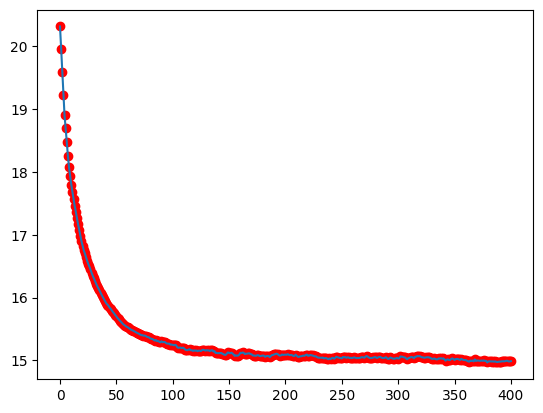

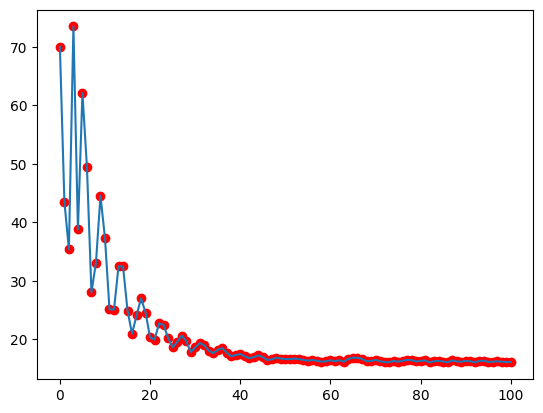

In [2]:
torch.cuda.empty_cache()
optimizer = Optimizer(outputDir, config)

# Run the optimization for the current image
# optimizer.run(imagePath, doStep1=True, doStep2=True, doStep3=True, renderer="vertex")
# Based on the vertex_based optimization, try to get to the same result with the Mitsuba one
# optimizer.run(outputImageDir+'/debug/results/ref.png', checkpoint=outputImageDir+'/checkpoints/stage1_output.pickle', doStep1=False, doStep2=True, doStep3=False, renderer="mitsuba")
# optimizer.run(imagePath, doStep1=True, doStep2=True, doStep3=True, rendererName="redner")
# optimizer.run(imagePath, doStep1=True, doStep2=True, doStep3=True, rendererName="mitsuba")
optimizer.run(imageFolderPath, doStep1=True, doStep2=True, doStep3=True, rendererName="mitsuba")
# optimizer.run(imagePath, checkpoint=outputImageDir+'/checkpoints/stage2_output.pickle',doStep1=False, doStep2=False, doStep3=True, renderer="mitsuba")
# optimizer.run(imagePath, doStep1=True, doStep2=True, doStep3=False, renderer="redner")

Results

In [ ]:
# from IPython.display import Image

# #display results
# # Directory containing the images
# dir_path = outputDir + 'bikerman_512.jpg/debug/results/'

# # Get a list of all the .png images in the directory
# image_files = glob.glob(os.path.join(dir_path, "*.png"))

# # Display each image in turn
# for image_file in image_files:
#     print(f"Displaying image: {os.path.basename(image_file)}")
#     display(Image(filename=image_file))
# print('2nd ')
# # dir_path = outputDir + 'bikerman_256.jpg/debug/results/'

# # # Get a list of all the .png images in the directory
# # image_files = glob.glob(os.path.join(dir_path, "*.png"))

# # # Display each image in turn
# # for image_file in image_files:
# #     print(f"Displaying image: {os.path.basename(image_file)}")
# #     display(Image(filename=image_file))

Mesh

In [ ]:
# # display meshes in polyscope
# import polyscope as ps
# import trimesh
# import glob
# import math

# display_meshes = ["mitsuba_step2_iter0.obj","mitsuba_step2_iter400.obj","redner_step2_iter0.obj","redner_step2_iter400.obj","vertex_step2_iter0.obj","vertex_step2_iter400.obj",]  # replace this with your mesh names

# outputDir = './output/test/bikerman_512.jpg/'
# # Get a list of all .obj files in the directory
# obj_files = glob.glob(os.path.join(outputDir + '/debug/mesh', "*.obj"))

# # Filter obj_files to only include the ones in display_meshes
# obj_files = [file for file in obj_files if os.path.basename(file) in display_meshes]

# # Define a folder where the screenshots will be saved
# screenshot_folder = outputDir+ "/debug/screenshot_folder"  # replace with your desired folder

# # Check if the folder exists, if not create it
# os.makedirs(screenshot_folder, exist_ok=True)

# # Initialize polyscope
# ps.init()
# # enable auto centering and scaling
# # ps.set_autocenter_structures(True)
# # ps.set_autoscale_structures(True)
# ps.set_up_dir("neg_y_up")
# # ps.set_bounding_box(-1.0,2.0)
# # ps.set_SSAA_factor(4)
# # ps.set_automatically_compute_scene_extents(True)
# # ps.set_autoscale_structures(True)
# # ps.set_autocenter_structures(True)
# # ps.set_ground_plane_height_factor(1.0,True)
# ps.set_ground_plane_mode("none")

# # # Show the mesh
# # ps.show()
# # Load and register each mesh to polyscope
# for idx, obj_file in enumerate(obj_files):
#     # mesh_name = os.path.basename(obj_file)  # get the name of the mesh
#     mesh_name = os.path.basename(obj_file)  # get the name of the mesh

#     # Load the mesh from an obj file using trimesh
#     mesh = trimesh.load_mesh(obj_file)
#     # Register the mesh to polyscope
#     ps_mesh = ps.register_surface_mesh(mesh_name, mesh.vertices, mesh.faces)
#     # Reset the transformation on the mesh
#     ps_mesh.reset_transform()
#     # Set a color for the mesh
#     color = torch.tensor([0.5, 0.5, 0.5]).numpy()  # set a fixed color
#     ps_mesh.set_color(color)
#     # Reset the view
#     ps.reset_camera_to_home_view()
#     # Show the mesh
#     ps.show()

#     # Take a screenshot and save it to the specified folder
#     screenshot_name = os.path.join(screenshot_folder, f"{mesh_name}_screenshot.png")
#     ps.screenshot(screenshot_name)

#     # Remove the mesh from polyscope to prepare for the next one
#     ps.remove_all_structures()
# #display results
# # Directory containing the images
# dir_path = outputDir + '/debug/screenshot_folder/'

# # Get a list of all the .png images in the directory
# image_files = glob.glob(os.path.join(dir_path, "*.png"))

# # Display each image in turn
# for image_file in image_files:
#     print(f"Displaying image: {os.path.basename(image_file)}")
#     display(Image(filename=image_file))